## Storytelling Case Study: Airbnb, NYC - Anuj Srivastava, Karthi Raj Narayanan, Malini S

### Problem background

### End Objective

### Algorithm

### 1. Import Necessarary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#filter warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Reading the dataset

#### A. Conversion of data into dataframe

In [2]:
#Conversion of data into dataframe
airbnb_df=pd.read_csv("AB_NYC_2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


#### B. Examining the dataframe

In [3]:
#checkiing the dimension of the dataframe
airbnb_df.shape

(48895, 16)

In [4]:
#Checking the information of the dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Checking the descriptive statistical values in the dataframe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#Checkinig the null values in the dataframe
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#Calculating the percentage of null values
round((airbnb_df.isnull().sum()/len(airbnb_df)*100),2).sort_values(ascending=False)

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [8]:
#Checking for duplicated rows
airbnb_df.duplicated().sum()

0

In [9]:
#Checking the unique values
airbnb_df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [10]:
#Checki.columnsng the columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### 3. Data cleaninig

In [11]:
#Calculating the percentage of null values
round((airbnb_df.isnull().sum()/len(airbnb_df)*100),2).sort_values(ascending=False)

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [12]:
#numerical features
df_numerical_features=airbnb_df.select_dtypes(include="number")
df_numerical_features.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [13]:
#categorical features
df_categorical_features=airbnb_df.select_dtypes(include="object")
df_categorical_features.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [14]:
#sanity check
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Numerical column:

#### 1. reviews_per_month 

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64
The skew values is: 3.13018853561771


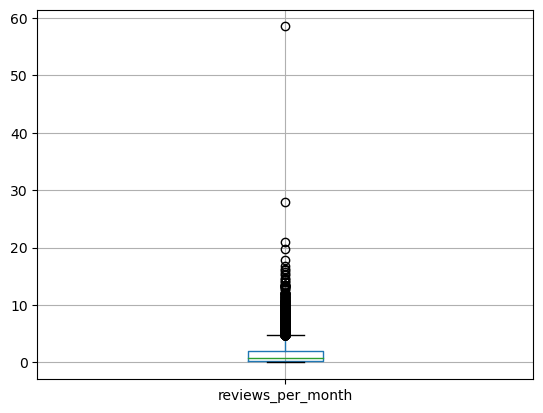

In [15]:
#reviews_per_month refers to number of reviews per month
print(airbnb_df.reviews_per_month.describe())
print("The skew values is:",airbnb_df.reviews_per_month.skew())
airbnb_df.boxplot(column=["reviews_per_month"])
plt.show()
# It is non-normally distributed since skew value is 3.13. more outliers are present. 
# So, it can be imputed with mean/median.

In [16]:
#Imputing reviews_per_month with median value
airbnb_df.reviews_per_month.fillna(airbnb_df.reviews_per_month.median(),inplace=True)

In [17]:
#checking missing values still present in reviews_per_month
airbnb_df.reviews_per_month.isnull().sum()

0

### Categorical columns

#### 1. last_review

In [18]:
#last_review refers to latest review
print("statistical values are:\n",airbnb_df.last_review.describe())
print("----------------------------")
print(airbnb_df.last_review.value_counts())

statistical values are:
 count          38843
unique          1764
top       23-06-2019
freq            1413
Name: last_review, dtype: object
----------------------------
23-06-2019    1413
01-07-2019    1359
30-06-2019    1341
24-06-2019     875
07-07-2019     718
              ... 
25-12-2012       1
01-10-2013       1
29-05-2014       1
19-04-2014       1
29-03-2018       1
Name: last_review, Length: 1764, dtype: int64


In [19]:
#last_review
airbnb_df.last_review.fillna(airbnb_df.last_review.mode()[0],inplace=True)

In [20]:
#checking missing values still present in last_review
airbnb_df.last_review.isnull().sum()

0

#### 2. host_name

In [21]:
#host_name refers to name of the host
print("statistical values are:\n",airbnb_df.host_name.describe())
print("----------------------------")
print(airbnb_df.host_name.value_counts())

statistical values are:
 count       48874
unique      11452
top       Michael
freq          417
Name: host_name, dtype: object
----------------------------
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64


#### 3. name

In [22]:
#name refers to name of the listing
print("statistical values are:\n",airbnb_df.name.describe())
print("----------------------------")
print(airbnb_df.name.value_counts())

statistical values are:
 count              48879
unique             47896
top       Hillside Hotel
freq                  18
Name: name, dtype: object
----------------------------
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64


In [23]:
#Filling missing values with "Anonymous" and "Unknown"
airbnb_df["name"].fillna("Anonymous",inplace=True)
airbnb_df["host_name"].fillna("Unknown",inplace=True)

In [24]:
#sanity check
round((airbnb_df.isnull().sum()/len(airbnb_df)*100),2).sort_values(ascending=False)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Hence, no null values in the dataset

Lets analyse one by one in detail

## 4. Univariate Analysis

### 4.1 Categorical variables

#### room_type

In [25]:
#room_type refers to listing space type
print("statistical values are:\n",airbnb_df.room_type.describe())
print("----------------------------")
print(airbnb_df.room_type.value_counts())

statistical values are:
 count               48895
unique                  3
top       Entire home/apt
freq                25409
Name: room_type, dtype: object
----------------------------
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


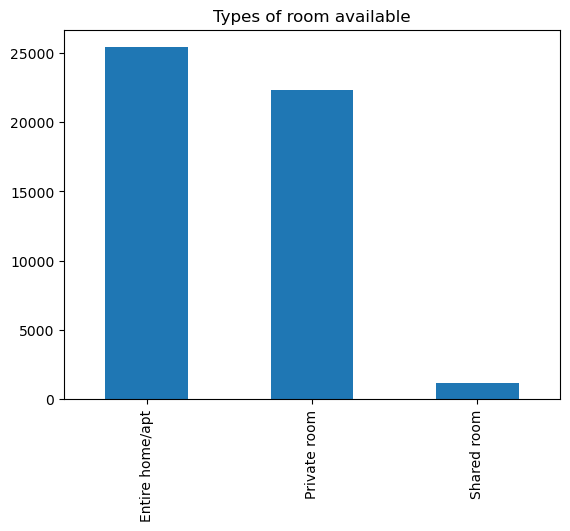

In [26]:
#barchart for room_type
airbnb_df["room_type"].value_counts().plot(kind="bar")
plt.title("Types of room available")
plt.show()

• There are 3 categories in room_type namely Entire home/apt, Private room, Shared room. customers prefers to Entire home/apt and Private room than  Shared room.

#### neighbourhood_group

In [27]:
#neighbourhood_group refers to location
print("statistical values are:\n",airbnb_df.neighbourhood_group.describe())
print("----------------------------")
print(airbnb_df.neighbourhood_group.value_counts())

statistical values are:
 count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object
----------------------------
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


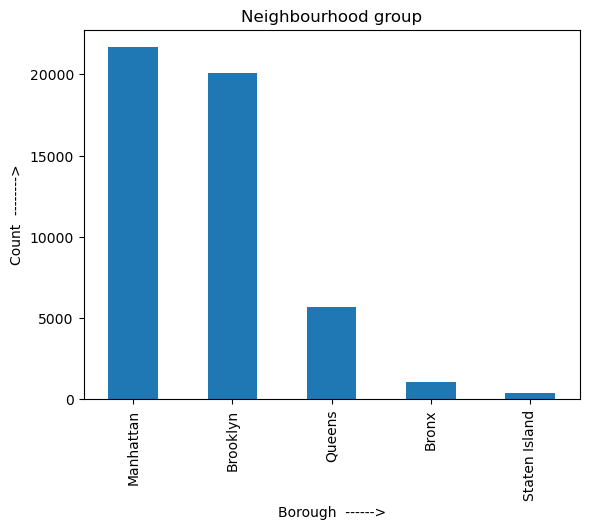

In [28]:
#barchart for neighbourhood_group
airbnb_df["neighbourhood_group"].value_counts().plot(kind="bar")
plt.title("Neighbourhood group")
plt.xlabel("Borough  ------>")
plt.ylabel("Count  -------->")
plt.show()

New york City is divided into five boroughs namely Manhattan, Brooklyn, Queens, Bronx, Staten Island. More number of customers are attracted to Manhattan borough and Brooklyn borough.

#### neighbourhood

In [29]:
#neighbourhood refers to area
print("statistical values are:\n",airbnb_df.neighbourhood.describe())
print("----------------------------")
print(airbnb_df.neighbourhood.value_counts().head(15))

statistical values are:
 count            48895
unique             221
top       Williamsburg
freq              3920
Name: neighbourhood, dtype: object
----------------------------
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64


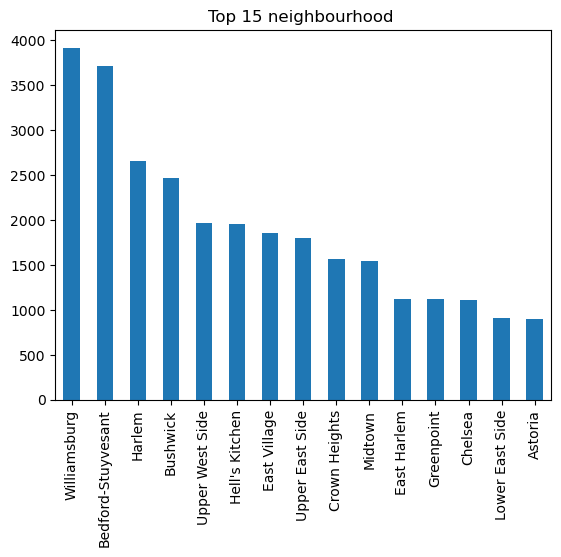

In [30]:
#barchart for neighbourhood
airbnb_df["neighbourhood"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 neighbourhood ")
plt.show()

• The top 6 area that hosts chooses airbnb are Williamsburg, Bedford-Stuyvesant, Harlem, Upper West Side, Hell's Kitchen, East Village.
• Williamsburg, Bedford-Stuyvesant, Bushwick, neighbourhood is situated in Borough Brooklyn whereas Harlem, Upper West Side,Hell's Kitchen located in borough Manhattan.

### 4.2 Numerical variables

### price

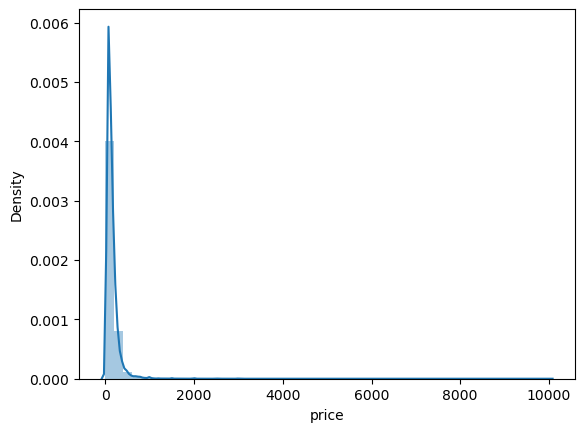

In [31]:
#price 
sns.distplot(airbnb_df["price"])
plt.show(block=False)

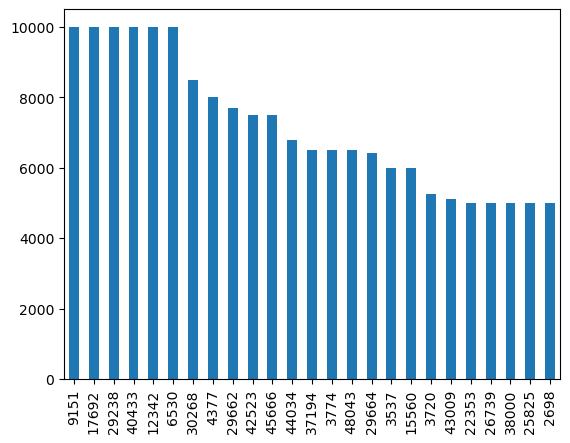

In [32]:
#Maximum price paid to a host
airbnb_df["price"].sort_values(ascending=False).head(25).plot(kind="bar")
plt.show(block=False)

• The highest amount paid is 10000 dollar to 6 hosts

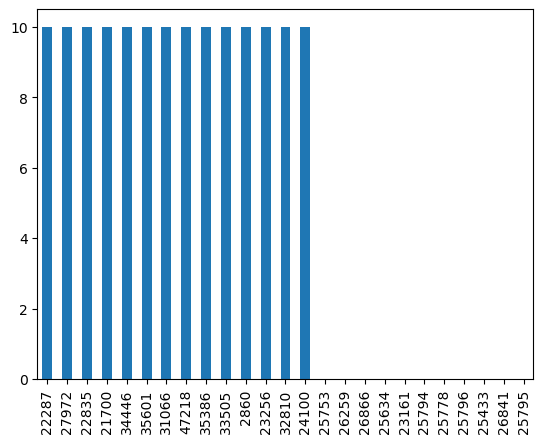

In [33]:
#minimum price to a host
airbnb_df["price"].sort_values(ascending=False).tail(25).plot(kind="bar")
plt.show(block=False)

• Around 11 hosts has not rented or with price 0 dollar value
• The minimum amount paid to host is 10 dollar.

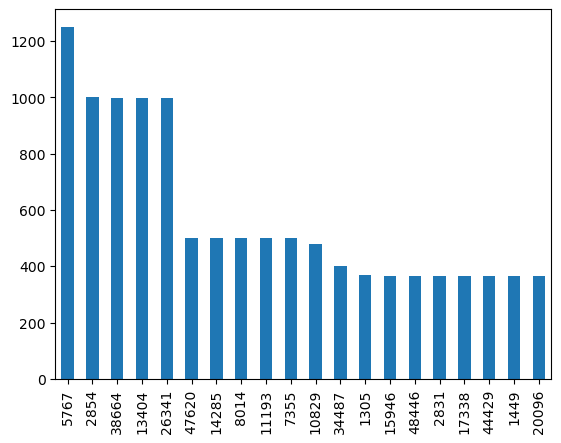

In [34]:
# minimum_nights refers to amonut of nights minimum
airbnb_df["minimum_nights"].sort_values(ascending=False).head(20).plot(kind="bar")
plt.show(block=False)

The highest "minimum nights" is 1250 nights and 6 hosts have  more number of customers who stayed for 1000+ nights

In [35]:
#least value of "minimum nights"
airbnb_df[airbnb_df["minimum_nights"]==1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
17,7322,Chelsea Perfect,18946,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140,1,260,01-07-2019,2.12,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48878,36479723,Room for rest,41326856,Jeerathinan,Queens,Elmhurst,40.74477,-73.87727,Private room,45,1,0,23-06-2019,0.72,5,172
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,23-06-2019,0.72,3,365
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,23-06-2019,0.72,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,23-06-2019,0.72,2,163


• Approximately 12,720 hosts have a minimum stay of 1 night.

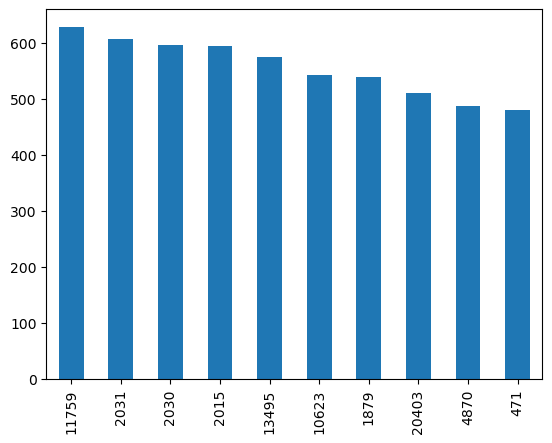

In [36]:
#number_of_reviews
airbnb_df["number_of_reviews"].sort_values(ascending=False).head(10).plot(kind="bar")
plt.show(block=False)

• The maximum number of reviews has a count of 629

In [37]:
airbnb_df[airbnb_df["number_of_reviews"]==629]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,05-07-2019,14.58,2,333


As on 05-07-2019, the highest number of reviews is obtained by a Room near JFK Queen Bed (a private room), located at Queens with neighbourhood as Jamaica, rented for 47$ with 14.58 score of reviews per month.

In [38]:
#number of reviews
airbnb_df["number_of_reviews"].sort_values(ascending=False).head(10)

11759    629
2031     607
2030     597
2015     594
13495    576
10623    543
1879     540
20403    510
4870     488
471      480
Name: number_of_reviews, dtype: int64

In [39]:
#least count on number of reviews
airbnb_df[airbnb_df["number_of_reviews"]==1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,09-10-2018,0.11,1,365
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,19-09-2011,0.01,1,1
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,17-09-2012,0.01,5,365
237,60673,Private Room/bath Luxurious Harlem,249372,Cynthia,Manhattan,Harlem,40.81583,-73.94707,Private room,175,2,1,07-10-2018,0.11,1,365
272,64707,Amazing Sunny & Breezy Home In the Heart of NYC,7310,Tilly,Manhattan,Little Italy,40.71702,-73.99811,Entire home/apt,90,14,1,02-01-2019,0.16,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,07-07-2019,1.00,1,230
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,07-07-2019,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,07-07-2019,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,07-07-2019,1.00,1,87


Nearly, 5244 hosts have a least number of reviews with score one

In [40]:
#binning on number_of_reviews
airbnb_df["number_of_reviews_bin"]=pd.qcut(airbnb_df["number_of_reviews"],q=[0,0.2,0.4,0.6,0.8,1],labels=["Poor","Medium","Good","Very Good"],duplicates='drop')
airbnb_df["number_of_reviews_bin"].head()

0       Medium
1    Very Good
2         Poor
3    Very Good
4       Medium
Name: number_of_reviews_bin, dtype: category
Categories (4, object): ['Poor' < 'Medium' < 'Good' < 'Very Good']

In [41]:
#reviews_per_month refers to number of reviews per month
airbnb_df["reviews_per_month"].sort_values(ascending=False).head(10)

42075    58.50
42076    27.95
38870    20.94
27287    19.75
28651    17.82
29628    16.81
20403    16.22
22469    16.03
36238    15.78
40297    15.32
Name: reviews_per_month, dtype: float64

The highest value of reviews_per_month is 58.5

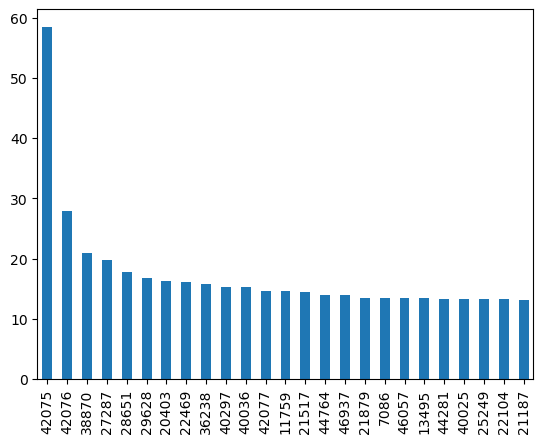

In [42]:
#reviews_per_month
airbnb_df["reviews_per_month"].sort_values(ascending=False).head(25).plot(kind="bar")
plt.show(block=False)

In [43]:
#reviews_per_month
airbnb_df[airbnb_df["reviews_per_month"]==58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_bin
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,07-07-2019,58.5,9,299,Very Good


As on 07-07-2019, the highest score of reviews_per_month is obtained by "Enjoy great views of the City in our Deluxe Room!" (private room) located at Manhattan and neighbourhood of Theater District rented for 100$ which has 156 number of reviews with 9 times calculated host listings count.    

In [44]:
#reviews_per_month
airbnb_df[airbnb_df["reviews_per_month"]==1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_bin
206,54544,City Room - Private Penthouse Apt.,256161,Wayne,Manhattan,Harlem,40.81035,-73.94598,Entire home/apt,121,1,104,22-06-2019,1.0,5,247,Very Good
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,01-07-2019,1.0,1,353,Very Good
1053,438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,Brooklyn,Prospect-Lefferts Gardens,40.65814,-73.96181,Entire home/apt,150,3,87,16-06-2019,1.0,1,73,Very Good
2070,927597,(2) CLEAN HOME AWAY FROM HOME!,4983320,Terri,Queens,Flushing,40.75444,-73.83057,Private room,76,1,75,01-01-2017,1.0,2,0,Very Good
2510,1291020,One family house sublet August 1st to August 31,6602545,Eleni,Brooklyn,South Slope,40.66812,-73.99022,Private room,160,30,1,19-06-2019,1.0,2,39,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,07-07-2019,1.0,1,230,Poor
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,07-07-2019,1.0,1,147,Poor
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,07-07-2019,1.0,6,339,Poor
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,07-07-2019,1.0,1,87,Poor


Almost, 893 hosts have minimum values as one on reviews_per_month  

Based on the above, we could bin the values

In [45]:
#binning on reviews_per_month
airbnb_df["reviews_per_month_bin"]=pd.qcut(airbnb_df["reviews_per_month"],q=[0,0.2,0.4,0.6,0.8,1],labels=["Poor","Medium","Good","Very Good"],duplicates='drop')
airbnb_df["reviews_per_month_bin"].head()

0       Medium
1       Medium
2       Medium
3    Very Good
4         Poor
Name: reviews_per_month_bin, dtype: category
Categories (4, object): ['Poor' < 'Medium' < 'Good' < 'Very Good']

In [46]:
#calculated_host_listings_count
host_listing_df=airbnb_df["name"].value_counts()[:5].reset_index()
host_listing_df.rename(columns={"index":"Name of the airbnb","name":"Number of times listed"},inplace=True)
host_listing_df

,Name of the airbnb,Number of times listed
0,Hillside Hotel,18
1,Home away from home,17
2,Anonymous,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


• The top airbnb which has listed maximum number of listing times is "Hillside Hotel" followed by "Home away from home"

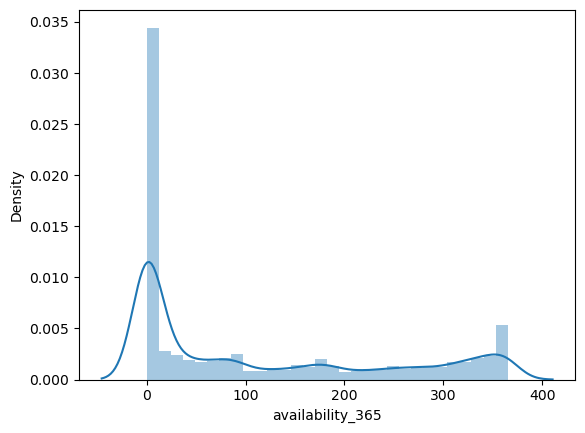

In [47]:
#availability_365 refers to number of days when listing is available for booking
sns.distplot(airbnb_df["availability_365"])
plt.show(block=False)

In [48]:
#binning on reviews_per_month
airbnb_df["availability_365_bin"]=pd.qcut(airbnb_df["reviews_per_month"],q=[0,0.2,0.4,0.6,0.8,1],labels=["less-available","Medium-available","Available","Highly-available"],duplicates='drop')
airbnb_df["availability_365_bin"].head()

0    Medium-available
1    Medium-available
2    Medium-available
3    Highly-available
4      less-available
Name: availability_365_bin, dtype: category
Categories (4, object): ['less-available' < 'Medium-available' < 'Available' < 'Highly-available']

### 4.3 Removing outliers

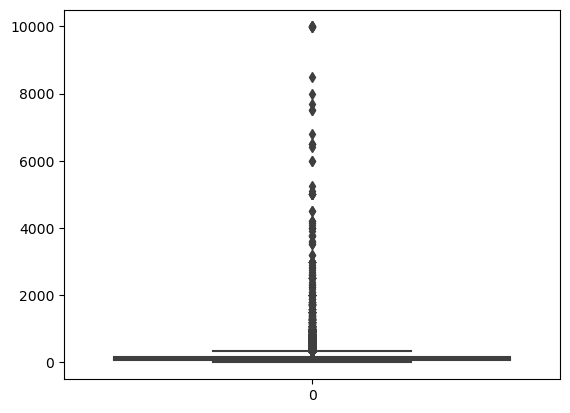

In [50]:
#Checking price
sns.boxplot(airbnb_df["price"])
plt.show()

In [51]:
#Removing outliers using IQR approach
Q1=airbnb_df.quantile(0.25)
Q3=airbnb_df.quantile(0.75)
IQR=Q3-Q1
IQR

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.300000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64

In [52]:
#Removing outliers using IQR approach
def outlier_iqr(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn, [25,75])
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [53]:
lower_bound,upper_bound = outlier_iqr(airbnb_df["price"])

In [54]:
#Removing outliers using IQR approach
airbnb_df[(airbnb_df.price<lower_bound)|(airbnb_df.price>upper_bound)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_bin,reviews_per_month_bin,availability_365_bin
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,03-11-2018,0.12,1,180,Medium,Poor,less-available
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,04-08-2016,0.24,1,7,Good,Medium,Medium-available
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,18-05-2019,0.55,2,243,Very Good,Medium,Medium-available
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,09-08-2017,0.06,4,298,Medium,Poor,less-available
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,30-12-2018,0.24,2,216,Good,Medium,Medium-available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,23-06-2019,0.72,1,364,Poor,Medium,Medium-available
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,23-06-2019,0.72,1,64,Poor,Medium,Medium-available
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,23-06-2019,0.72,1,23,Poor,Medium,Medium-available
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,23-06-2019,0.72,1,9,Poor,Medium,Medium-available


In [55]:
#substituting only those rows  which are greater than the lower range and lesser than the upper range
airbnb_df_new=airbnb_df[(airbnb_df.price>lower_bound)&(airbnb_df.price<upper_bound)]
airbnb_df_new

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_bin,reviews_per_month_bin,availability_365_bin
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,Medium,Medium,Medium-available
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,Very Good,Medium,Medium-available
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,23-06-2019,0.72,1,365,Poor,Medium,Medium-available
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Very Good,Very Good,Highly-available
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,Medium,Poor,less-available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,23-06-2019,0.72,2,9,Poor,Medium,Medium-available
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,23-06-2019,0.72,2,36,Poor,Medium,Medium-available
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,23-06-2019,0.72,1,27,Poor,Medium,Medium-available
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,23-06-2019,0.72,6,2,Poor,Medium,Medium-available


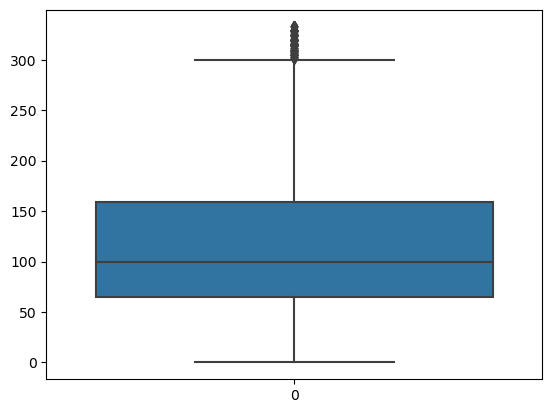

In [56]:
#Checking price once again
sns.boxplot(airbnb_df_new["price"])
plt.show()

• It seems that outliers are almost removed.

## 5. Bivaraite Analysis

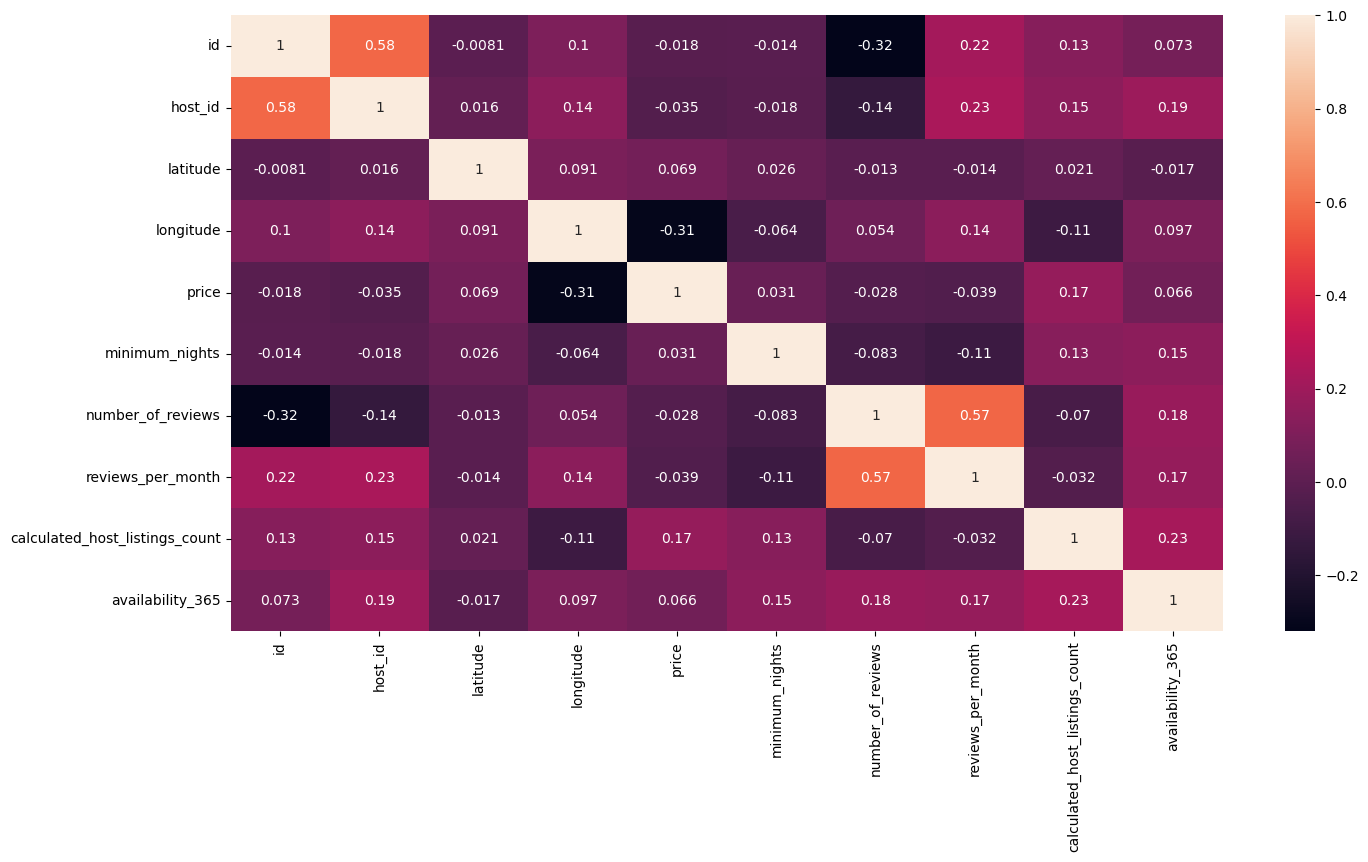

In [57]:
#correlation matrix
corr=airbnb_df_new.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)
plt.show()

### Location variables

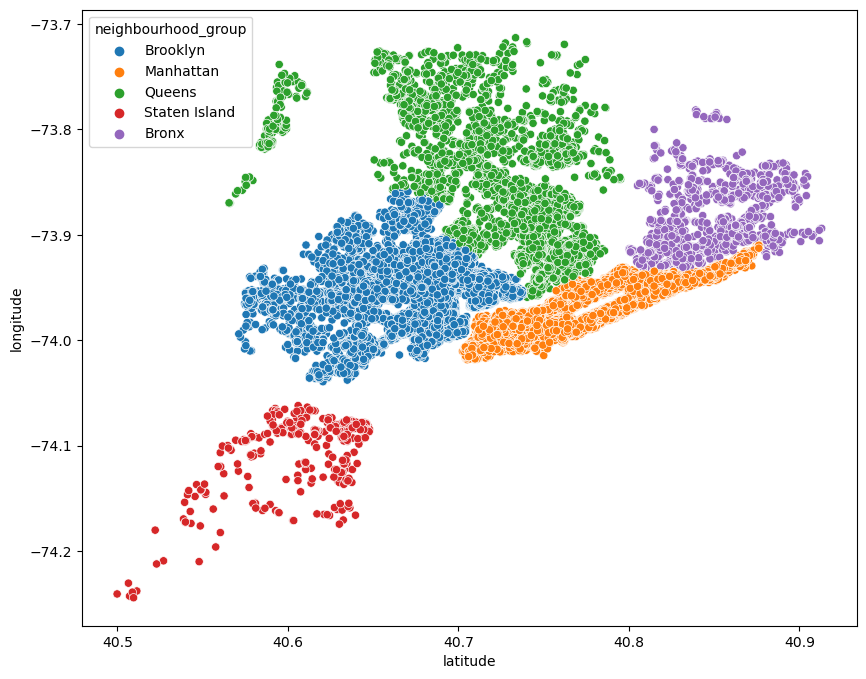

In [58]:
#Location variables with neighbourhood_group
plt.figure(figsize=(10,8))
sns.scatterplot(data=airbnb_df_new,x="latitude",y="longitude",hue="neighbourhood_group")
plt.show(block=False)

The figure represents the NYC location with latitude and longtitude

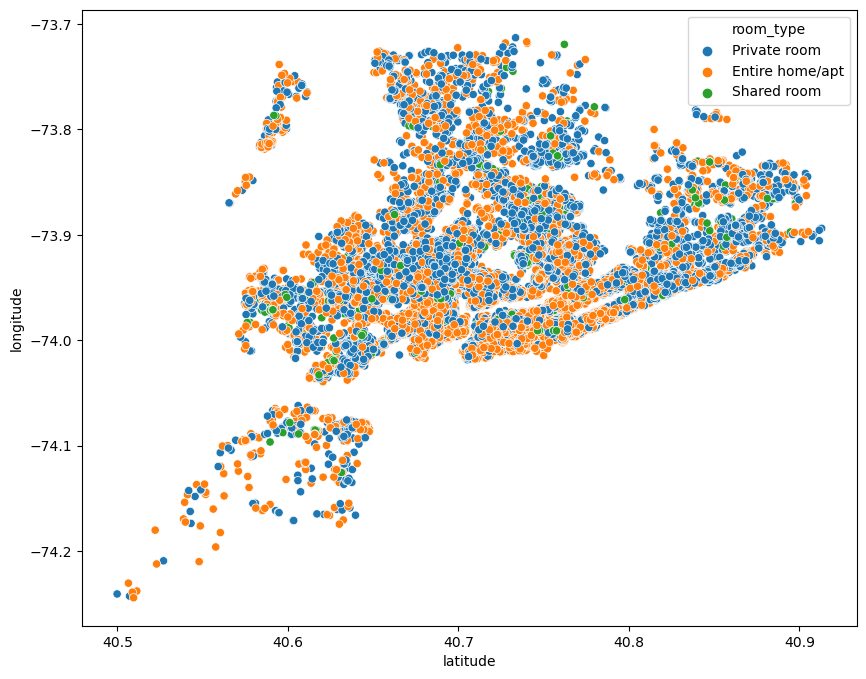

In [59]:
#Location variables with room_type
plt.figure(figsize=(10,8))
sns.scatterplot(data=airbnb_df_new,x="latitude",y="longitude",hue="room_type")
plt.show(block=False)

• The above figure shows that the distribution of NYC with respect to types of room

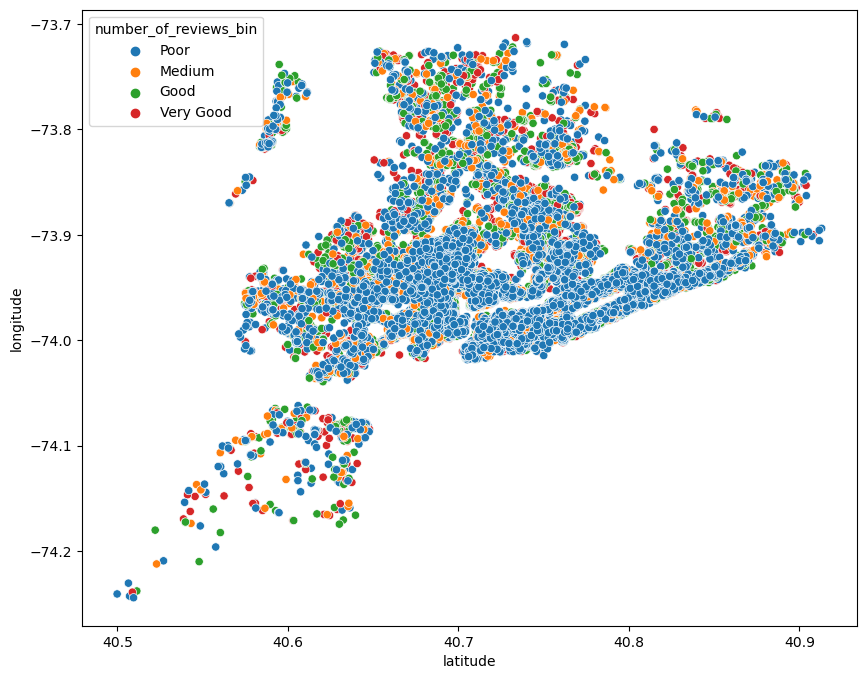

In [60]:
#Location variables with number_of_reviews_bin
plt.figure(figsize=(10,8))
sns.scatterplot(data=airbnb_df_new,x="latitude",y="longitude",hue="number_of_reviews_bin")
plt.show(block=False)

The above figure represents the dispersion of NYC with respect to binned values of number of reviews

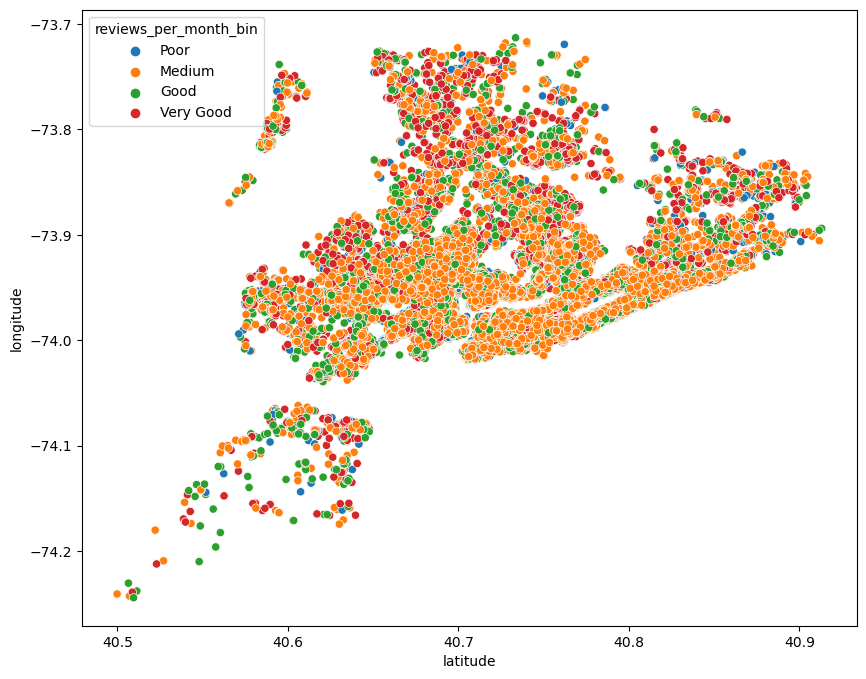

In [61]:
#Location variables with reviews_per_month_bin
plt.figure(figsize=(10,8))
sns.scatterplot(data=airbnb_df_new,x="latitude",y="longitude",hue="reviews_per_month_bin")
plt.show(block=False)

The above figure represents the dispersion of NYC with respect to binned values of reviews per month

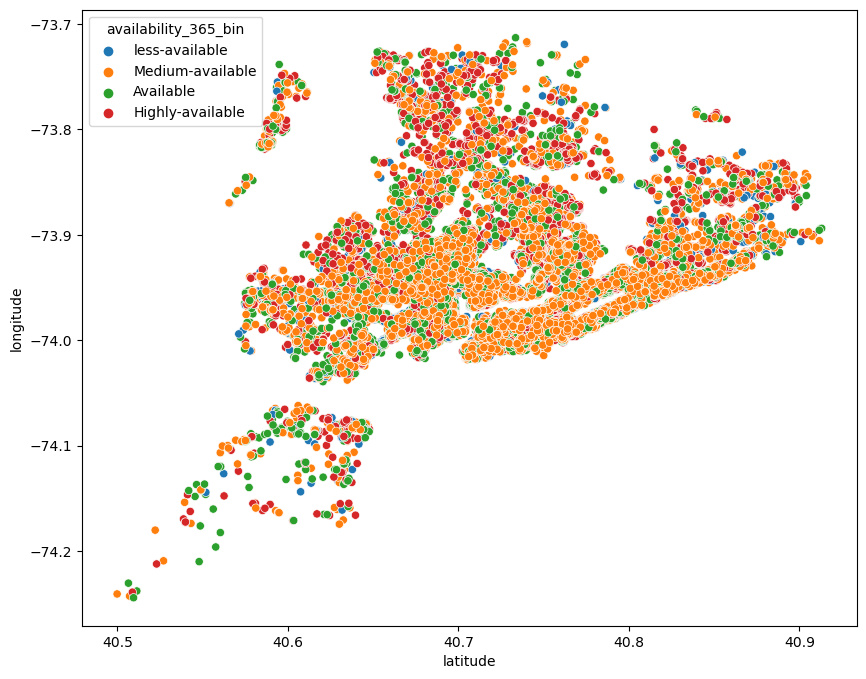

In [62]:
#Location variables with availability_365_bin
plt.figure(figsize=(10,8))
sns.scatterplot(data=airbnb_df_new,x="latitude",y="longitude",hue="availability_365_bin")
plt.show(block=False)

The above figure represents the dispersion of NYC with respect to binned values of availability_365

## Top 10 listings based on Price, reviews,neighbourhood group and room type

In [63]:
#Costliest - based on price, reviews and roomtype
airbnb_df_new.sort_values(by="price",ascending=False)[["name","neighbourhood_group","neighbourhood","room_type","number_of_reviews_bin","reviews_per_month_bin"]][:10]

,name,neighbourhood_group,neighbourhood,room_type,number_of_reviews_bin,reviews_per_month_bin
15150,Midtown Sleep 6 Central Convenience,Manhattan,Midtown,Entire home/apt,Very Good,Very Good
38565,Parisian Palace in Heart of Manhattan,Manhattan,Chelsea,Entire home/apt,Medium,Good
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,Manhattan,Upper West Side,Entire home/apt,Poor,Medium
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,Manhattan,Midtown,Entire home/apt,Very Good,Very Good
48567,Your Private Duplex Mansion in the HEART of NYC!,Manhattan,West Village,Entire home/apt,Poor,Medium
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",Manhattan,Lower East Side,Private room,Very Good,Good
45303,Five-star luxury Apt in Chelsea !,Manhattan,Chelsea,Entire home/apt,Medium,Very Good
13798,Mid-Century Museum Sleepover,Brooklyn,Williamsburg,Entire home/apt,Poor,Medium
32976,Luxurious 2bed/2.5bath with Central Park Views,Manhattan,Midtown,Entire home/apt,Poor,Poor
46439,CHELSEA CENTRAL LUXURY 2BATHS,Manhattan,Chelsea,Entire home/apt,Poor,Medium


Almost, the airbnb's are located at Manhattan and room type is Entire home/apt

In [64]:
#Affordable - based on price, reviews and roomtype
airbnb_df_new.sort_values(by="price",ascending=True)[["name","neighbourhood_group","neighbourhood","room_type","number_of_reviews_bin","reviews_per_month_bin"]][:10]

,name,neighbourhood_group,neighbourhood,room_type,number_of_reviews_bin,reviews_per_month_bin
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,Shared room,Poor,Poor
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Private room,Very Good,Very Good
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Private room,Good,Medium
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Private room,Good,Medium
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Entire home/apt,Poor,Poor
25794,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,Private room,Very Good,Very Good
25795,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,Private room,Very Good,Very Good
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,Private room,Very Good,Very Good
26866,Best Coliving space ever! Shared room.,Brooklyn,Bushwick,Shared room,Medium,Medium
26259,the best you can find,Manhattan,Murray Hill,Entire home/apt,Poor,Medium
